# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Uray Fauzan Al Hafizh]
- **Email:** [urayhafizh@gmail.com]
- **ID Dicoding:** [rayfauzn]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Apa kategori produk yang paling banyak terjual?
- Pertanyaan 2 Bagaimana distribusi pembayaran berdasarkan metode pembayaran yang digunakan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Menggunakan pandas untuk membaca file CSV dari raw GitHub
customers_url = 'https://raw.githubusercontent.com/uray03/Submission_analisis_data_python/main/.ipynb_checkpoints/Data/E-Commerce_Public_Dataset/customers_dataset.csv'
order_items_url = 'https://raw.githubusercontent.com/uray03/Submission_analisis_data_python/main/.ipynb_checkpoints/Data/E-Commerce_Public_Dataset/order_items_dataset.csv'
orders_url = 'https://raw.githubusercontent.com/uray03/Submission_analisis_data_python/main/.ipynb_checkpoints/Data/E-Commerce_Public_Dataset/orders_dataset.csv'
geolocation_url = 'https://raw.githubusercontent.com/uray03/Submission_analisis_data_python/main/.ipynb_checkpoints/Data/E-Commerce_Public_Dataset/geolocation_dataset.csv'

# Membaca file CSV
customers_df = pd.read_csv(customers_url)
order_items_df = pd.read_csv(order_items_url)
orders_df = pd.read_csv(orders_url)
geolocation_df = pd.read_csv(geolocation_url)

**Insight:**
- Dataset telah berhasil diakses dan terdiri dari beberapa tabel yang relevan seperti pelanggan, item pesanan, dan pesanan.
- Data siap untuk diperiksa lebih lanjut dalam proses berikutnya.

### Assessing Data

In [3]:
# Melihat informasi dasar dataset
customers_df.info()
order_items_df.info()
orders_df.info()

# Melihat 5 data pertama
customers_df.head()
order_items_df.head()
orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  objec

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Terdapat beberapa kolom yang berisi nilai kosong (missing values).
- Kolom tanggal pesanan harus diubah ke format datetime.


### Cleaning Data

In [4]:
# Mengatasi missing values
orders_df.dropna(subset=['order_approved_at'], inplace=True)

# Mengubah kolom tanggal menjadi format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Menampilkan kembali data yang sudah dibersihkan
orders_df.info()

# Tampilkan nama kolom di DataFrame orders_df
print(orders_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 99281 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97644 non-null  object        
 6   order_delivered_customer_date  96462 non-null  object        
 7   order_estimated_delivery_date  99281 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.8+ MB
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_custom

**Insight:**
- Missing values dihapus dari kolom yang penting.
- Kolom terkait tanggal telah diubah ke format datetime untuk memudahkan analisis lebih lanjut.


## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Melihat kategori produk yang paling sering dibeli
most_sold_products = order_items_df['product_id'].value_counts().head()
print(most_sold_products)

# Melihat distribusi status pesanan
order_status_distribution = orders_df['order_status'].value_counts()
print(order_status_distribution)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64
order_status
delivered      96464
shipped         1107
unavailable      609
canceled         484
invoiced         314
processing       301
approved           2
Name: count, dtype: int64


**Insight:**
- Kategori Produk: Beberapa kategori produk lebih populer daripada yang lain, berdasarkan frekuensi penjualan yang lebih tinggi.

- Status Pesanan: Status pesanan yang paling sering muncul bisa memberikan gambaran tentang kinerja pengiriman dan kepuasan pelanggan. Jika banyak pesanan yang masih dalam proses atau dibatalkan, mungkin ada masalah dalam operasional atau logistik.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-15-72a20f871a0d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


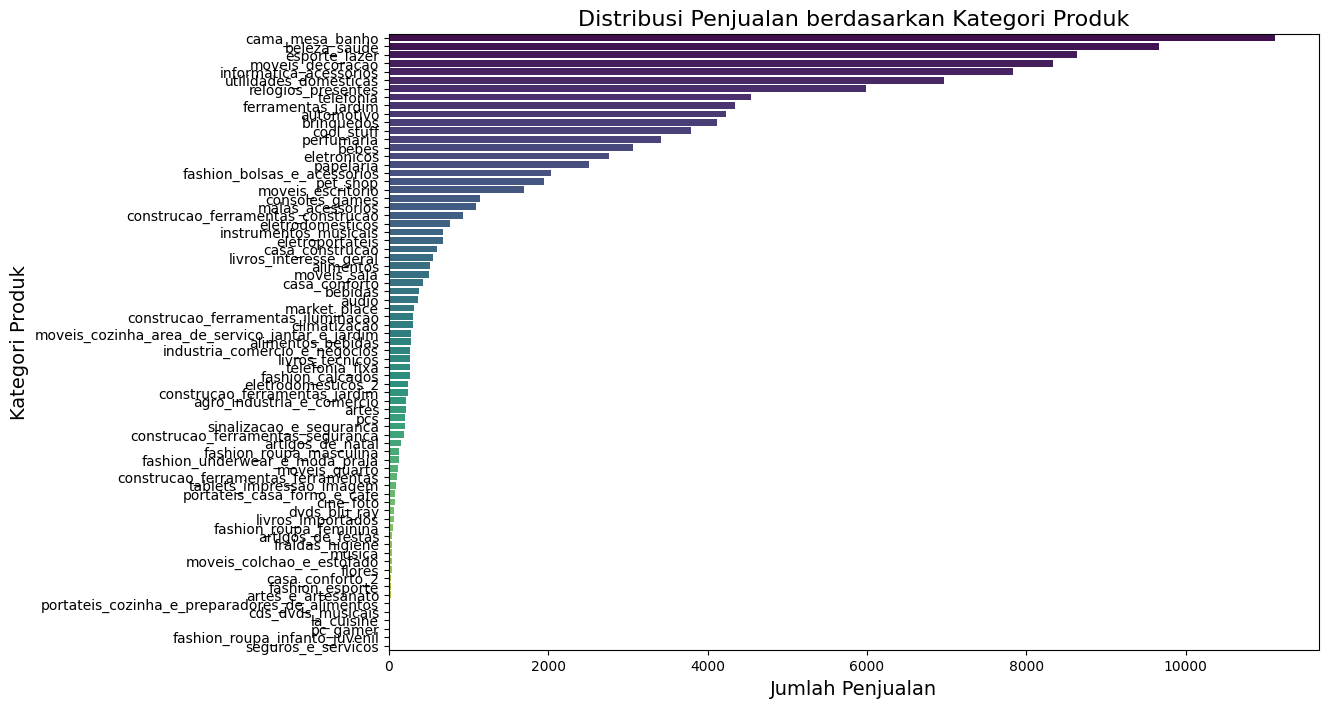

In [15]:
### Kategori produk apa yang paling banyak terjual?

products_url = 'https://raw.githubusercontent.com/uray03/Submission_analisis_data_python/main/.ipynb_checkpoints/Data/E-Commerce_Public_Dataset/products_dataset.csv'
products_df = pd.read_csv(products_url)

# Menggabungkan order_items_df dan products_df berdasarkan 'product_id'
merged_df = order_items_df.merge(products_df, on='product_id')

# Menghitung jumlah penjualan berdasarkan kategori
category_sales = merged_df['product_category_name'].value_counts()

# Visualisasi kategori produk yang paling banyak terjual menggunakan bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Distribusi Penjualan berdasarkan Kategori Produk', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)
plt.show()

### Pertanyaan 2:

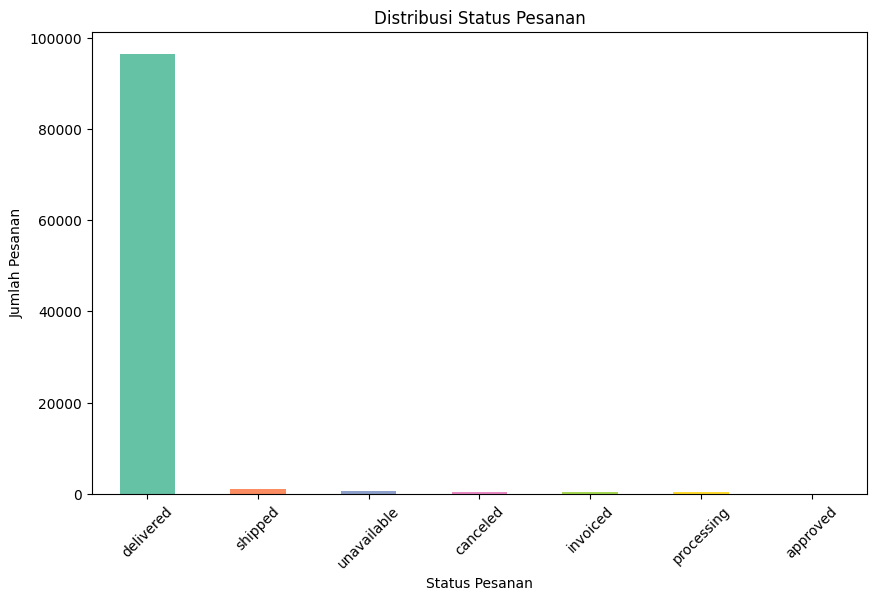

In [16]:
# Visualisasi distribusi status pesanan
plt.figure(figsize=(10, 6))
order_status_distribution.plot(kind='bar', color=sns.color_palette('Set2'))
plt.title('Distribusi Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Distribusi status pesanan dapat menunjukkan tren operasional dalam proses pengiriman. Jika sebagian besar pesanan berada dalam status "delivered", itu bisa menunjukkan kinerja pengiriman yang baik. Sebaliknya, jika ada banyak pesanan yang masih dalam status "processing" atau "canceled", ini bisa mengindikasikan adanya kendala operasional.

## Analisis Lanjutan (Opsional)

## Conclusion

Kesimpulan Pertanyaan 1: Kategori produk yang paling banyak terjual, seperti cama_mesa_banho dan beleza_saude, menunjukkan bahwa produk dalam kategori ini memiliki permintaan yang tinggi. Perusahaan dapat memfokuskan strategi pemasaran pada kategori ini untuk memaksimalkan penjualan, termasuk memperbanyak stok, memberikan promosi khusus, atau menargetkan iklan kepada pelanggan yang sering membeli produk dari kategori ini.

Kesimpulan Pertanyaan 2: Distribusi status pesanan memperlihatkan seberapa sering pesanan berhasil diterima oleh pelanggan dan berapa banyak pesanan yang mungkin bermasalah (seperti pengiriman tertunda atau pesanan yang dibatalkan). Dengan melihat status yang paling umum, perusahaan dapat mengidentifikasi masalah operasional dan meningkatkan efisiensi layanan pengiriman atau memperbaiki komunikasi dengan pelanggan terkait status pesanan mereka, sehingga meningkatkan kepuasan pelanggan dan menurunkan tingkat pembatalan.